In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest, f_oneway,f_regression,RFE

import pandas_profiling
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as sm

%matplotlib inline

In [30]:
hr = pd.read_csv('C:/Python/Class/Class 18-19 Files/Logisic Regression/2. HR Analytics - Predicting employee Attrition-Practise/HR_comma_sep.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
hr.shape

(14999, 10)

In [20]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [25]:
num_var = [key for key in dict(hr.dtypes) if dict(hr.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var = [key for key in dict(hr.dtypes) if dict(hr.dtypes)[key] in ['object', 'O']]
print(num_var)
print(cat_var)

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']
['department', 'salary']


In [26]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [40]:
hr_num = hr[num_var]
hr_cat= hr[cat_var]

In [41]:
def outlier_treat(x):
    x = x.clip(upper = x.quantile(0.99),lower = x.quantile(0.01))
    return x

In [42]:
hr_num = hr_num.apply(outlier_treat)

In [32]:
hr_num.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612760,0.716252,3.803054,201.034802,3.498233,0.144610,0.238083,0.021268
std,0.248517,0.170873,1.232592,49.771459,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.390000,2.000000,104.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,0.990000,1.000000,7.000000,301.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
hr.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [9]:
hr.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [38]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [45]:
for i in hr_cat.columns:
   # hr_cat[c_feature] = hr_cat[c_feature].astype('category')
    hr_cat = create_dummies(hr_cat ,i)

In [47]:
hr_cat.head()

,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,0


In [51]:
hr_data = pd.concat([hr_num,hr_cat], axis=1)

In [52]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


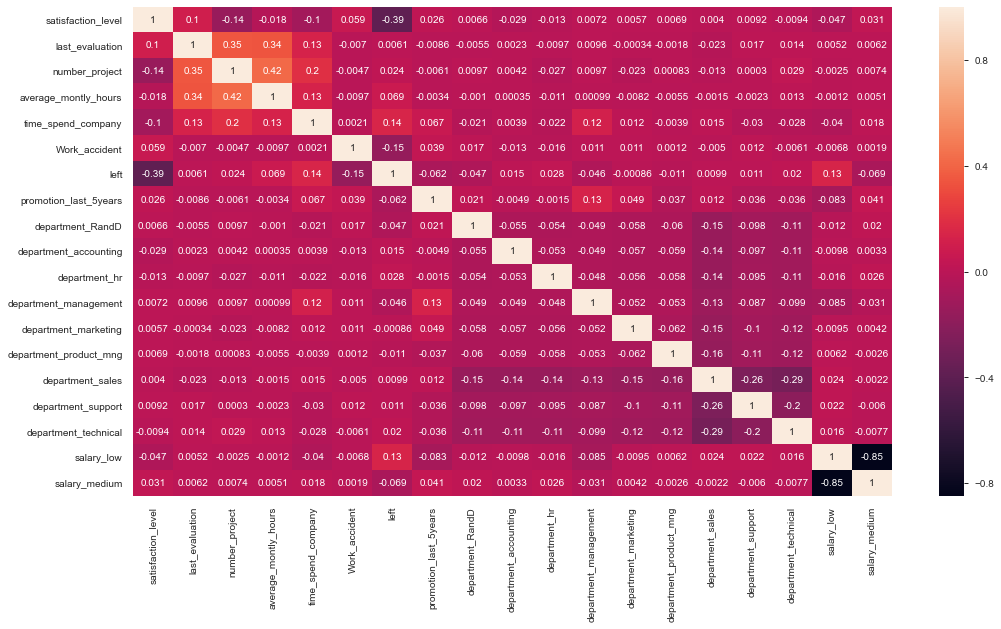

In [60]:
plt.figure(figsize=(17,9))
sns.heatmap(hr_data.corr(),annot = True)

### RFE

In [66]:
X = hr_data[hr_data.columns.difference(['left'])]
y = hr_data['left']

In [67]:
rfe = RFE(LogisticRegression(), 10)

In [68]:
rfe_var =  rfe.fit(X,y)

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [83]:
X_new = X[X.columns[rfe_var.get_support()]]

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 42 )

In [154]:
logreg = LogisticRegression()

In [155]:
logreg.fit(X_train, y_train)

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [156]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [124]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, recall_score, precision_score, roc_auc_score

In [157]:
result = pd.DataFrame()
result['accuracy'] = pd.Series(accuracy_score(y_test,y_pred))
result ['precision'] = pd.Series(precision_score(y_test, y_pred))
result ['recall'] = pd.Series(recall_score(y_test, y_pred))
result ['f1_score'] = pd.Series(f1_score(y_test,y_pred))
result

,accuracy,precision,recall,f1_score
0,0.784,0.582508,0.329291,0.420739


In [158]:
print(confusion_matrix(y_test,y_pred))

[[3175  253]
 [ 719  353]]


In [159]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3428
           1       0.58      0.33      0.42      1072

    accuracy                           0.78      4500
   macro avg       0.70      0.63      0.64      4500
weighted avg       0.76      0.78      0.76      4500



In [160]:
roc_auc_score(y_test,y_pred)

0.6277435387241157

In [161]:
roc_auc_score(y_train,x_pred)

0.5947646808723489

In [131]:
x_pred = logreg.predict(X_train)

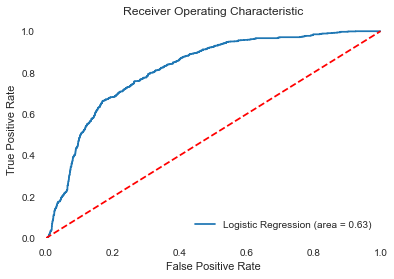

In [172]:

#Generate AUC-ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
#plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [188]:
a[(a['tpr']==a['tpr'].max())]

,fpr,tpr,thresholds
1312,0.918611,1.0,0.026613
1313,0.928238,1.0,0.023607
1314,0.928821,1.0,0.023271
1315,0.929405,1.0,0.022584
1316,0.929988,1.0,0.022508
1317,0.940490,1.0,0.020265
1318,0.941074,1.0,0.020227
1319,0.941365,1.0,0.020173
1320,0.941949,1.0,0.020147
1321,0.954201,1.0,0.017097
